# Visualizing BEAST  MCC Tree Using BALTIC

Maximum clade credability tree was dervied from BEAST output using Tree Annotator. BEAST was run using Yule speciation process and strict molecular clock. Location was input as a continuous bivariate trait that represented latitude and longitude and was modeled with gamma RRW. For the first rooted tree, only location was infered (clone did not inform the tree). For the second tree, both the location and clone was infered for all ancestors. 

In [101]:
import baltic as bt ## In working directory OR add the path to baltic.py to your $PYTHONPATH environment variable

## Rooted tree w/ location as continuous bivariate trait

In [102]:
tree = bt.loadNexus('alleles_spatial_20.mcc', absoluteTime=False) ## Load the tree (tree has gamma RRW for location inferennce and clones in names of taxa, but not in inference)

In [103]:
from matplotlib import pyplot as plt
import matplotlib as mpl
import matplotlib.lines as mlines
%matplotlib inline 
## Magic words for jupyter notebooks

In [104]:
colors = {'beta':'lightgreen','gamma': 'gold', 'alpha': 'darkturquoise', 'epsilon':'salmon', 'zeta': 'orange', 'eta':'magenta','delta':
          'deepskyblue','ungrouped':'silver','normal':'k'}


In [105]:
colors2 = {'beta':'lightgreen','gamma': 'gold', 'alpha': 'darkturquoise', 'epsilon':'salmon', 'zeta': 'orange', 'eta':'magenta','delta':
          'deepskyblue','ungrouped':'silver','omega':'k'}

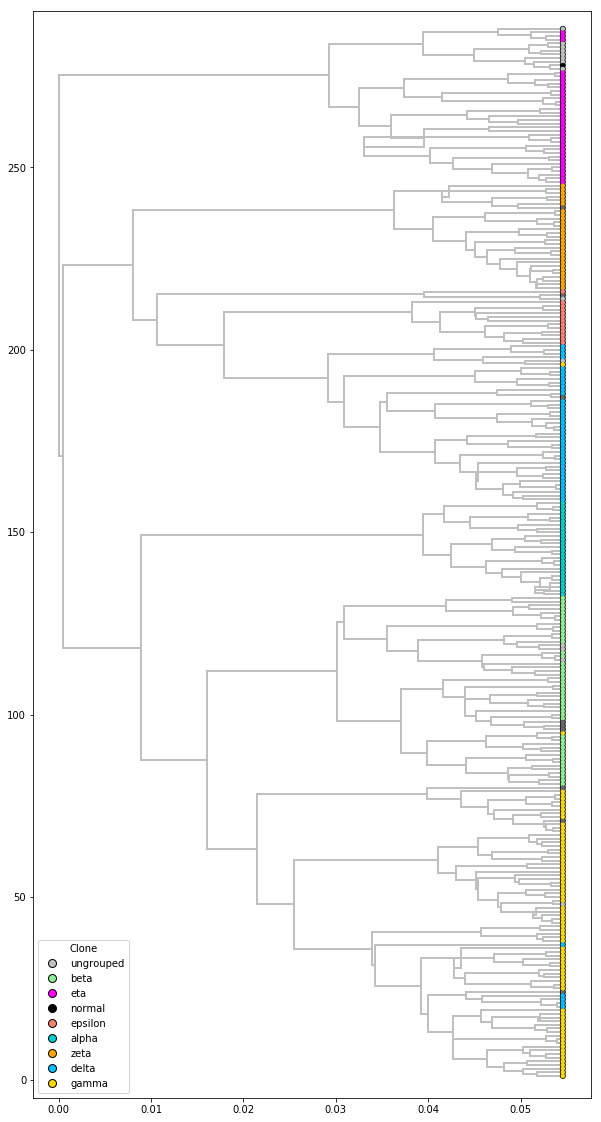

In [106]:
fig,ax = plt.subplots(figsize=(10,20),facecolor='w')
'''
Subplots can help you make, well, subplots. You can specify things like number of plots, rows/columns, etc.
We don't care about that here because we just need one. 
fig = figure
ax = axis
'''

'''
Gytis's example baltic code lives at https://github.com/blab/baltic/blob/master/austechia.ipynb
'''

branchWidth=2 ## default branch width

#cmap=mpl.cm.viridis ## colors! https://github.com/blab/wiki/wiki/Colors

for k in tree.Objects: ## iterate over objects in tree
    x=k.x ## or from x position determined earlier
#     x=k.absoluteTime ## or use absolute time instead
    y=k.y ## get y position from .drawTree that was run earlier, but could be anything else
    
    xp=k.parent.x ## get x position of current object's parent
#     xp=k.parent.absoluteTime ## get x position of current object's parent
    if x==None: ## matplotlib won't plot Nones, like root
        x=0.0
    if xp==None:
        xp=x
    #if (isinstance(k, bt.leaf) or k.branchType=='leaf') and len(k.name.split('|')) > 1:
    if isinstance(k, bt.leaf) and len(k.name.split('|')) > 1:
        c = colors[k.name.split('|')[-3]]
    else:
        c='dimgray' ## colour can be fixed
#     c=cmap(k.height/ll.treeHeight) ## or be a function of something else
#     c=[cmap(k.traits['host.prob']) if k.traits.has_key('host.prob') else cmap(1.0)][0]
#     c=['indianred' if k.traits['PB1']=='V' else 'steelblue'][0] ## can be discrete too
    
    if isinstance(k,bt.leaf) or k.branchType=='leaf': ## if leaf...
        #x=decimalDate(k.name.split('_')[-1],variable=True) ## get x position from name
        
        s=50 ## tip size can be fixed
        s=50-30*k.height/tree.treeHeight
        
        ax.scatter(x,y,s=s,facecolor=c,edgecolor='none',zorder=11) ## plot circle for every tip
        ax.scatter(x,y,s=s+0.8*s,facecolor='k',edgecolor='none',zorder=10) ## plot black circle underneath
    elif isinstance(k,bt.node) or k.branchType=='node': ## if node...
        #ax.plot([x,x],[k.children[-1].y,k.children[0].y],lw=branchWidth,color=c,ls='-',zorder=9)
        ax.plot([x,x],[k.children[-1].y,k.children[0].y],lw=branchWidth,color='silver',ls='-',zorder=9)
        
    #ax.plot([xp,x],[y,y],lw=branchWidth,color=c,ls='-',zorder=9)
    ax.plot([xp,x],[y,y],lw=branchWidth,color='silver',ls='-',zorder=9)
    
       
ax.set_ylim(-5,tree.ySpan+5)
han_list = []

for key in colors:
    marker = mlines.Line2D(range(1), range(1), color="white", marker='o', markerfacecolor = colors[key], label = key, markeredgecolor='k',markersize = 8)
    han_list.append(marker)

plt.legend(handles = han_list,markerfirst = True,title = 'Clone')
plt.show()

## Rooted tree w/ continuous bivariate space and inferred clone traits

In [107]:
tree2 = bt.loadNexus('alleles_spatial_clone_30.mcc', absoluteTime=False) #tree with locations + clones as infered traits

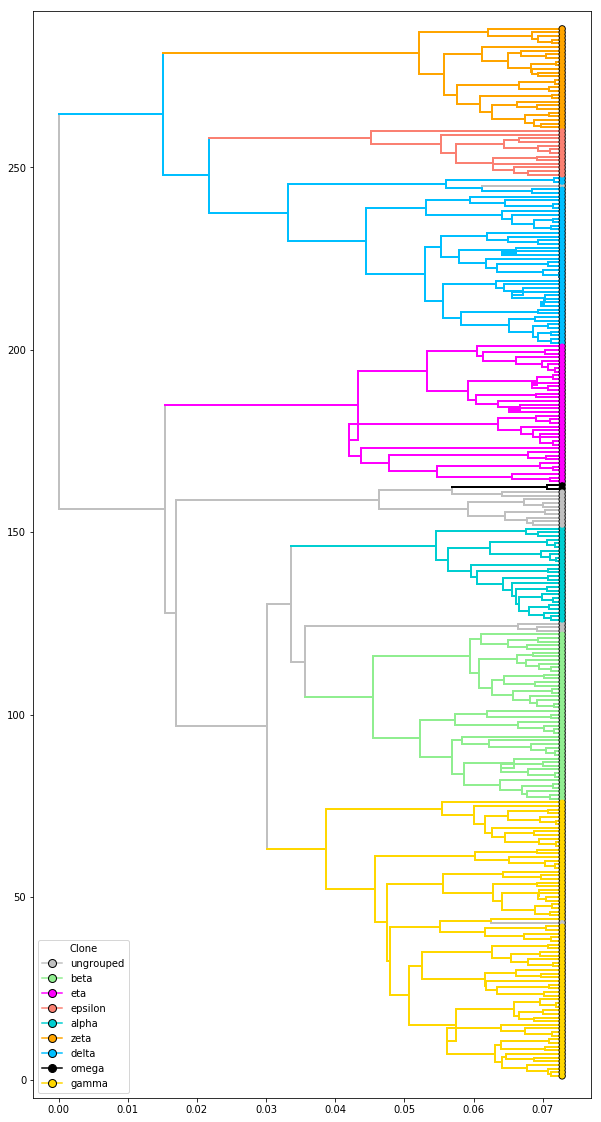

In [108]:
fig1,ax = plt.subplots(figsize=(10,20),facecolor='w')
#ax = fig.add_subplot(3, 1, 1)

'''
Subplots can help you make, well, subplots. You can specify things like number of plots, rows/columns, etc.
We don't care about that here because we just need one. 
fig = figure
ax = axis
'''

'''
Gytis's example baltic code lives at https://github.com/blab/baltic/blob/master/austechia.ipynb
'''

branchWidth=2 ## default branch width

cmap=mpl.cm.viridis ## colors! https://github.com/blab/wiki/wiki/Colors

for k in tree2.Objects: ## iterate over objects in tree
    x=k.x ## or from x position determined earlier
#     x=k.absoluteTime ## or use absolute time instead
    y=k.y ## get y position from .drawTree that was run earlier, but could be anything else
    
    xp=k.parent.x ## get x position of current object's parent
#     xp=k.parent.absoluteTime ## get x position of current object's parent
    if x==None: ## matplotlib won't plot Nones, like root
        x=0.0
    if xp==None:
        xp=x
    #if (isinstance(k, bt.leaf) or k.branchType=='leaf') and len(k.name.split('|')) > 1:
    #if isinstance(k, bt.leaf) and len(k.name.split('|')) > 1:
        #c = colors[k.name.split('|')[-3]]
    #else:
        #c='dimgray' ## colour can be fixed
    if k.traits['clone'] != 'nan':
        c = colors2[k.traits['clone']] if k.traits.has_key('clone') else cmap(1.0)[0]
    else: c = 'silver'
#     c=cmap(k.height/ll.treeHeight) ## or be a function of something else
#     c=[cmap(k.traits['host.prob']) if k.traits.has_key('host.prob') else cmap(1.0)][0]
#     c=['indianred' if k.traits['PB1']=='V' else 'steelblue'][0] ## can be discrete too
    
    if isinstance(k,bt.leaf) or k.branchType=='leaf': ## if leaf...
        #x=decimalDate(k.name.split('_')[-1],variable=True) ## get x position from name
        
        s=30 ## tip size can be fixed
        #s=50-30*k.height/tree2.treeHeight
        
        ax.scatter(x,y,s=s,facecolor=c,edgecolor='none',zorder=11) ## plot circle for every tip
        ax.scatter(x,y,s=s+0.8*s,facecolor='k',edgecolor='none',zorder=10) ## plot black circle underneath
    elif isinstance(k,bt.node) or k.branchType=='node': ## if node...
        #ax.plot([x,x],[k.children[-1].y,k.children[0].y],lw=branchWidth,color=c,ls='-',zorder=9)
        ax.plot([x,x],[k.children[-1].y,k.children[0].y],lw=branchWidth, color= c ,ls='-',zorder=9)
        
    #ax.plot([xp,x],[y,y],lw=branchWidth,color=c,ls='-',zorder=9)
    ax.plot([xp,x],[y,y],lw=branchWidth,color= c ,ls='-',zorder=9)
    
       
ax.set_ylim(-5,tree2.ySpan+5)
han_list = []

for key in colors2:
    marker = mlines.Line2D(range(1), range(1), color = colors2[key], marker='o', markerfacecolor = colors2[key], label = key, markeredgecolor='k',markersize = 8)
    han_list.append(marker)

plt.legend(handles = han_list,markerfirst = True,title = 'Clone')
plt.savefig('rootedTree.png')
plt.show()

## .... Unrooted tree

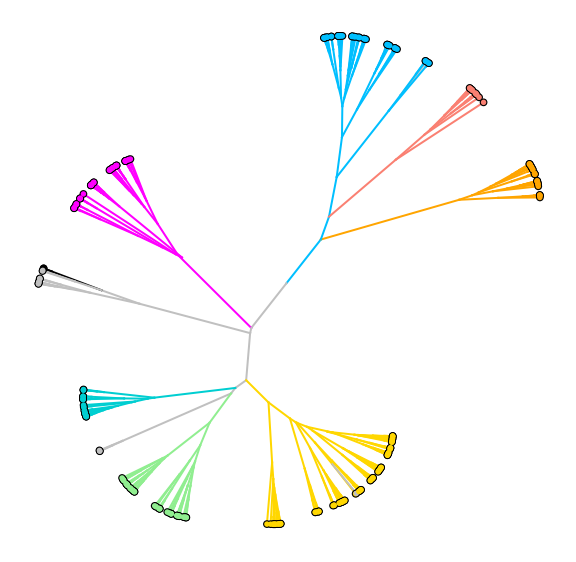

In [109]:
tree2 = bt.loadNexus('alleles_spatial_clone_30.mcc', absoluteTime=False) #tree with locations + clones as infered traits
tree2.uncollapseSubtree() ## uncollapse
tree2.drawUnrooted() ## draw tree as unrooted

fig,ax = plt.subplots(figsize=(10,10),facecolor='w')


for k in tree2.Objects: ## iterate over objects in tree
    x=k.x ## or from x position determined earlier
    y=k.y ## get y position from .drawTree that was run earlier, but could be anything else
    
    xp=k.parent.x ## get x position of current object's parent
    yp=k.parent.y
    
    if x==None: ## matplotlib won't plot Nones, like root
        x=0.0
    if xp==None:
        xp=x

    if k.traits['clone'] != 'nan':
        c = colors2[k.traits['clone']] if k.traits.has_key('clone') else cmap(1.0)[0]
    else: c = 'silver' 
    #cmap=[mpl.cm.Reds if k.traits['type']=='HongKong' else mpl.cm.Blues][0] ## pick colour map based on trait
    #c=cmap(k.height/mtt.treeHeight) ## colour with colour map based on height of branch
    if k.branchType=='leaf': ## if leaf...
        #s=30 ## tip size can be fixed
        s=30*k.height/tree2.treeHeight

        ax.scatter(x,y,s=s,facecolor=c,edgecolor='none',zorder=11) ## plot circle for every tip
        ax.scatter(x,y,s=s*2,facecolor='k',edgecolor='none',zorder=10) ## plot black circle underneath
    
    ax.plot([xp,x],[yp,y],lw=branchWidth,color=c,ls='-',zorder=9)

ax.spines['top'].set_visible(False) ## no axes
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.tick_params(axis='x',size=0) ## no labels
ax.tick_params(axis='y',size=0)
ax.set_xticklabels([])
ax.set_yticklabels([])
plt.savefig('unrootedTree.png')


## .... Continuous space (x,y)

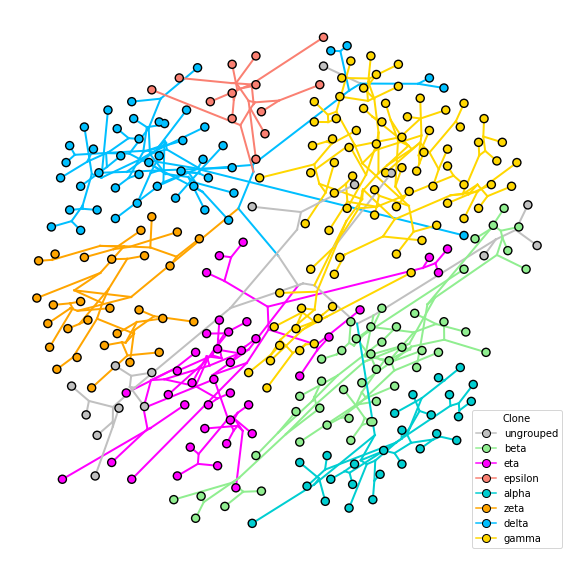

In [123]:
tree2 = bt.loadNexus('alleles_spatial_clone_30.mcc', absoluteTime=False) #tree with locations + clones as infered trait
colors3 = {'beta':'lightgreen','gamma': 'gold', 'alpha': 'darkturquoise', 'epsilon':'salmon', 'zeta': 'orange', 'eta':'magenta','delta':
          'deepskyblue','ungrouped':'silver'}
fig,ax = plt.subplots(figsize=(10,10),facecolor='w')

for k in tree2.Objects: ## iterate over objects in tree

    x = k.traits['location1']
    y = k.traits['location2']
    if  k.parent.traits.has_key('location1'):
        xp = k.parent.traits['location1']
    else:
        xp  = x
    if  k.parent.traits.has_key('location2'):
        yp = k.parent.traits['location2']
    else:
        yp = y
    
    if x==None: ## matplotlib won't plot Nones, like root
        x=0.0
    if xp==None:
        xp=x
    if k.traits['clone'] != 'omega':
        
        if k.traits['clone'] != 'nan':
            c = colors3[k.traits['clone']] if k.traits.has_key('clone') else cmap(1.0)[0]
        else: c = 'silver' 

        if k.branchType=='leaf': ## if leaf...
            s=45 ## tip size can be fixed
        
            ax.scatter(x,y,s=s,facecolor=c,edgecolor='none',zorder=11) ## plot circle for every tip
            ax.scatter(x,y,s=s*2,facecolor='k',edgecolor='none',zorder=10) ## plot black circle underneath
            
        ax.plot([xp,x],[yp,y],lw=branchWidth,color=c,ls='-',zorder=9)

ax.spines['top'].set_visible(False) ## no axes
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.tick_params(axis='x',size=0) ## no labels
ax.tick_params(axis='y',size=0)
ax.set_xticklabels([])
ax.set_yticklabels([])
han_list = []

for key in colors3:
    marker = mlines.Line2D(range(1), range(1), color = colors3[key], marker='o', markerfacecolor = colors3[key], label = key, markeredgecolor='k',markersize = 8)
    han_list.append(marker)

plt.legend(handles = han_list,markerfirst = True,title = 'Clone')

plt.savefig('2dspaceTree.png')
plt.show()


## .... Continuous space (x,y) w/  evolutionary distance (z)

In [111]:
from mpl_toolkits.mplot3d import Axes3D

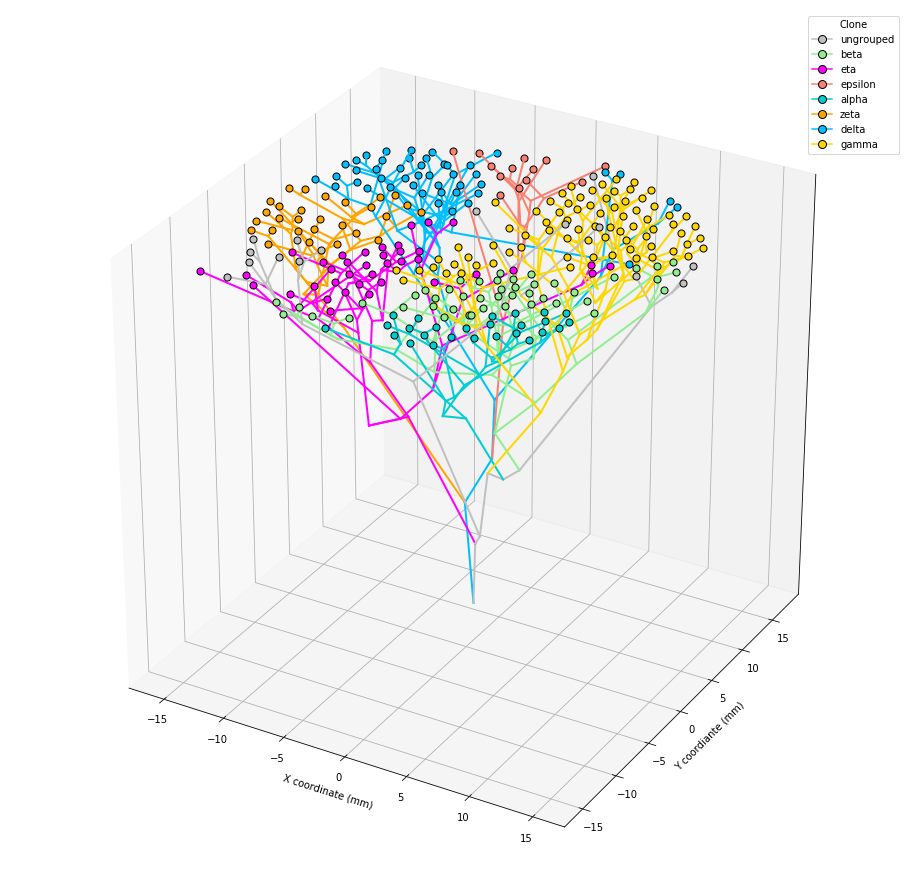

In [124]:
tree2 = bt.loadNexus('alleles_spatial_clone_30.mcc', absoluteTime=False) #tree with locations + clones as infered trait

fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(111, projection='3d')

branchWidth=2 ## default branch width

for k in tree2.Objects: ## iterate over objects in tree
    
    x = k.traits['location1']
    y = k.traits['location2']
    if  k.parent.traits.has_key('location1'):
        xp = k.parent.traits['location1']
    else:
        xp  = x
    if  k.parent.traits.has_key('location2'):
        yp = k.parent.traits['location2']
    else:
        yp = y
    
    if x==None: ## matplotlib won't plot Nones, like root
        x=0.0
    if xp==None:
        xp=x
    z = k.x
    zp = k.parent.x
    if z == None:
        z = 0.0
    if zp == None:
        zp = z
    if k.traits['clone'] != 'omega':
        if k.traits['clone'] != 'nan':
            c = colors3[k.traits['clone']] if k.traits.has_key('clone') else cmap(1.0)[0]
        else: c = 'silver'
    
        if isinstance(k,bt.leaf) or k.branchType=='leaf': ## if leaf...e
        
            s = 50
            ax.scatter(x, y, z, zdir='z', s=s, c=c, depthshade=True,zorder = 10,edgecolor = 'k')
    
        ax.plot([xp,x],[yp,y],[zp,z],lw=branchWidth,color=c,ls='-',zorder=9)
        

han_list = []

for key in colors2:
    marker = mlines.Line2D(range(1), range(1), color = colors3[key], marker='o', markerfacecolor = colors3[key], label = key, markeredgecolor='k',markersize = 8)
    han_list.append(marker)

plt.legend(handles = han_list,markerfirst = True,title = 'Clone')
ax.set_xlabel('X coordinate (mm)')
ax.set_ylabel('Y coordiante (mm)')
ax.set_zticks([])


plt.savefig('3dspaceTree.png')
plt.show()